In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
churn_df = pd.read_csv('E:/Data/churn-bigml-80.csv', sep = ',')
churn_df_test = pd.read_csv('E:/Data/churn-bigml-20.csv', sep = ',')

In [3]:
churn_df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
2662,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2663,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2664,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


#### Data Manipulation

In [4]:
churn_df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [5]:
# Label Encoder is used for mapping categorical data into 0,1
from sklearn.preprocessing import LabelEncoder
le_encoder = LabelEncoder()

In [7]:
churn_df['International plan'].drop_duplicates()

0     No
3    Yes
Name: International plan, dtype: object

In [6]:
le_encoder.fit(churn_df['International plan'].drop_duplicates())

LabelEncoder()

In [8]:
churn_df['International plan'] = le_encoder.transform(churn_df['International plan'])
churn_df_test['International plan'] = le_encoder.transform(churn_df_test['International plan'])

In [9]:
le_encoder.fit(churn_df['Voice mail plan'].drop_duplicates())

LabelEncoder()

In [10]:
churn_df['Voice mail plan'] = le_encoder.transform(churn_df['Voice mail plan'])
churn_df_test['Voice mail plan'] = le_encoder.transform(churn_df_test['Voice mail plan'])

In [11]:
churn_df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,0,0,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
2662,AZ,192,415,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2663,WV,68,415,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2664,RI,28,510,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


#### Correlation

<AxesSubplot:>

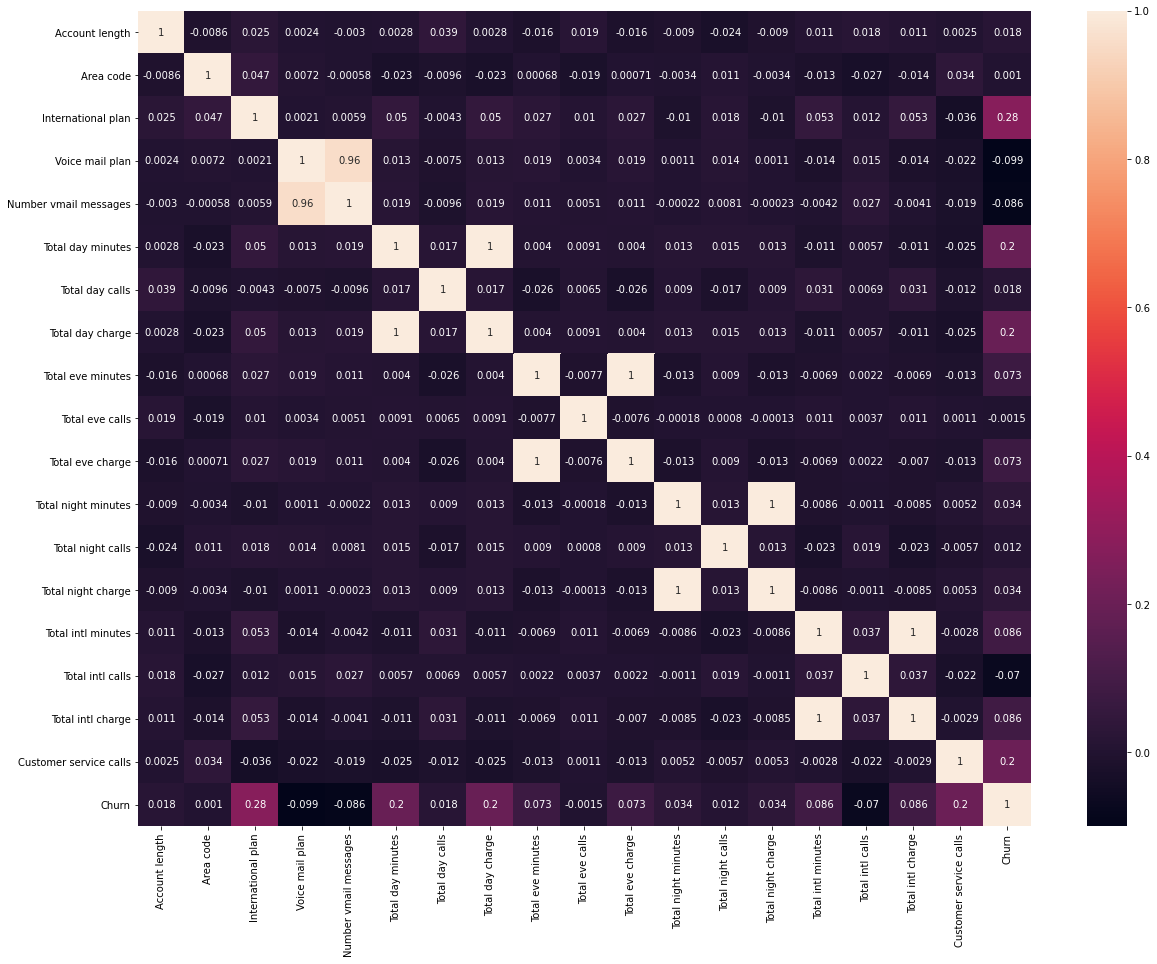

In [12]:
plt.figure(figsize = (20,15))
sns.heatmap(churn_df.corr('pearson'), annot = True)   # 

In [13]:
churn_df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

#### Data Augmentation

        * This is Imbalanced Class

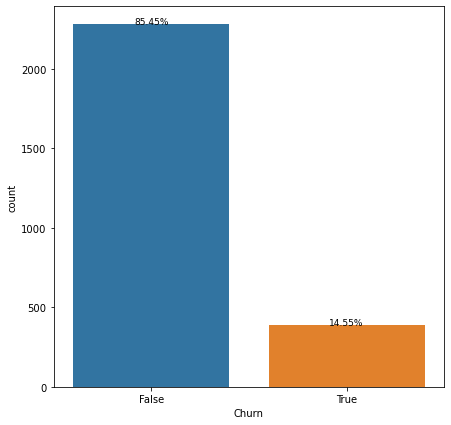

In [17]:
plt.figure(figsize=(7,7))
fig = sns.countplot(x='Churn',data=churn_df)
sizes=[]
for p in fig.patches:
    height = p.get_height()
    sizes.append(height)
    fig.text(p.get_x() + p.get_width()/2, height,
            '{:1.2f}%'.format(height/len(churn_df)*100),ha='center', fontsize=9)

In [18]:
churn_df['Churn'].value_counts()

False    2278
True      388
Name: Churn, dtype: int64

In [19]:
# Upsampling the True samples to eliminate Imbalanced Data Distribution
from sklearn.utils import resample
df_0 = churn_df[churn_df['Churn'] == False]
df_1 = churn_df[churn_df['Churn'] == True]

In [20]:
# Apply Resample
df_1_upsample = resample(df_1, n_samples = 1388, replace = True, random_state = 123)

In [21]:
churn_df1 = pd.concat([df_0, df_1_upsample])
churn_df1

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,NV,69,510,1,1,33,271.5,98,46.16,253.4,102,21.54,165.4,85,7.44,8.2,2,2.21,1,True
2233,ME,62,415,1,1,32,218.4,93,37.13,236.7,132,20.12,192.2,137,8.65,13.2,3,3.56,0,True
455,NC,133,408,1,1,32,221.1,137,37.59,264.9,99,22.52,168.9,108,7.60,15.4,4,4.16,2,True
120,VT,117,408,1,0,0,167.1,86,28.41,177.5,87,15.09,249.4,132,11.22,14.1,7,3.81,2,True


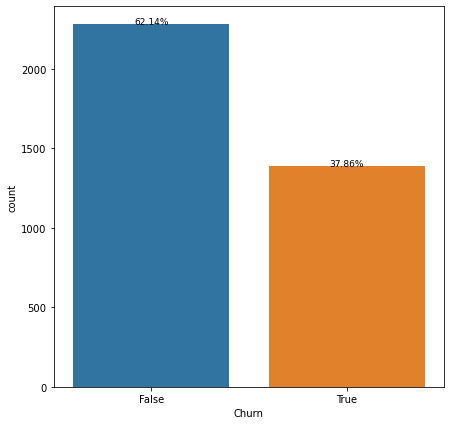

In [23]:
plt.figure(figsize=(7,7))
fig = sns.countplot(x='Churn',data=churn_df1)
sizes=[]
for p in fig.patches:
    height = p.get_height()
    sizes.append(height)
    fig.text(p.get_x() + p.get_width()/2, height,
            '{:1.2f}%'.format(height/len(churn_df1)*100),ha='center', fontsize=9)

#### Features

In [24]:
X = churn_df1.drop(['State','Number vmail messages','Total day charge','Total eve charge','Total night charge', 
                    'Total intl charge', 'Churn'], axis = 1)
Y = churn_df1['Churn']

#### Train & Test

In [25]:
X

,Account length,Area code,International plan,Voice mail plan,Total day minutes,Total day calls,Total eve minutes,Total eve calls,Total night minutes,Total night calls,Total intl minutes,Total intl calls,Customer service calls
0,128,415,0,1,265.1,110,197.4,99,244.7,91,10.0,3,1
1,107,415,0,1,161.6,123,195.5,103,254.4,103,13.7,3,1
2,137,415,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0
3,84,408,1,0,299.4,71,61.9,88,196.9,89,6.6,7,2
4,75,415,1,0,166.7,113,148.3,122,186.9,121,10.1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,69,510,1,1,271.5,98,253.4,102,165.4,85,8.2,2,1
2233,62,415,1,1,218.4,93,236.7,132,192.2,137,13.2,3,0
455,133,408,1,1,221.1,137,264.9,99,168.9,108,15.4,4,2
120,117,408,1,0,167.1,86,177.5,87,249.4,132,14.1,7,2


In [26]:
from sklearn.model_selection import train_test_split
# Choose a random state values
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 8)

#### Decision Tree Classifier

In [53]:
from sklearn.tree import DecisionTreeClassifier
# maximum depth of decision tree , class_weight = 'balanced'
clf_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_depth=12, class_weight = {False:0.38, True:0.62})

In [54]:
clf_tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={False: 0.38, True: 0.62},
                       criterion='entropy', max_depth=12, random_state=0)

In [55]:
clf_tree.get_depth()

12

In [56]:
clf_tree.score(x_test, y_test)

0.9509536784741145

In [57]:
clf_tree.score(x_train, y_train)

0.9805593451568895

#### Plot Decision Tree

In [42]:
clf_tree

DecisionTreeClassifier(class_weight={False: 0.38, True: 0.62},
                       criterion='entropy', max_depth=12, random_state=0)

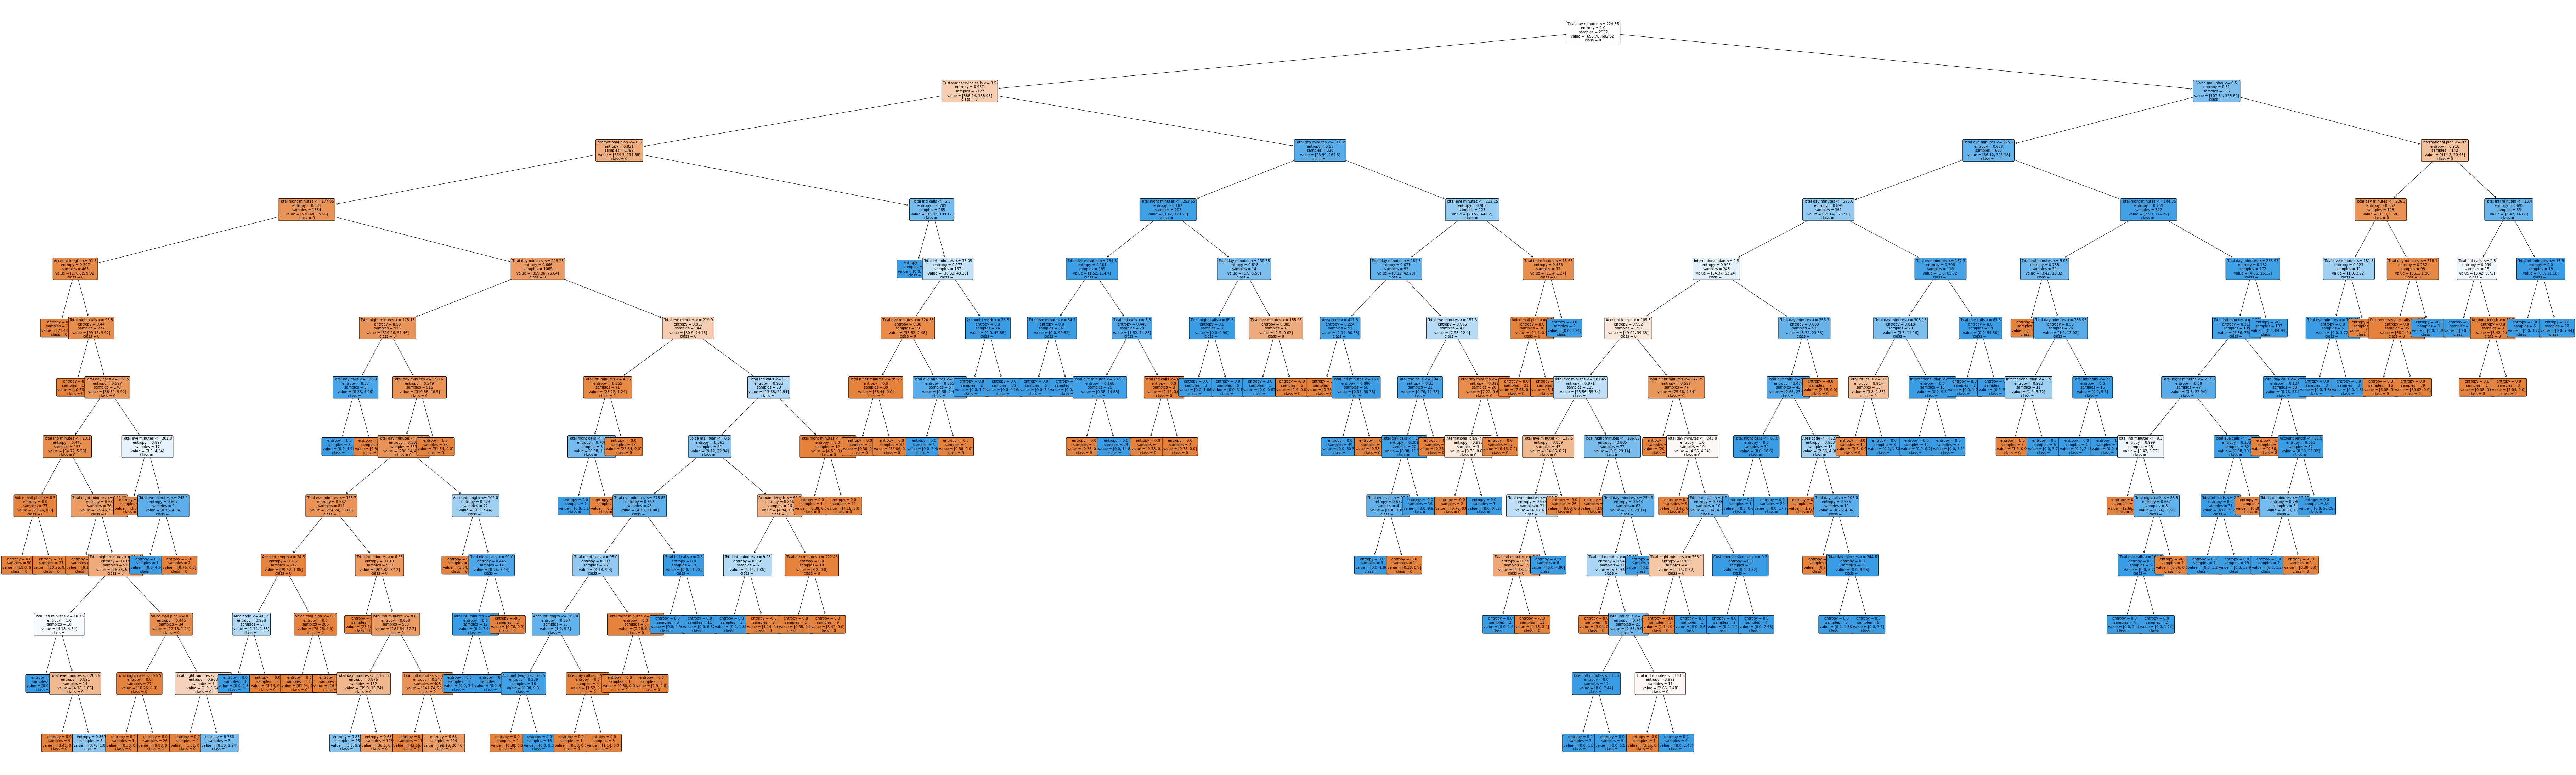

In [44]:
from sklearn import tree
fig = plt.figure(figsize=(130,40))
_ = tree.plot_tree(clf_tree, feature_names=X.columns, class_names=str(churn_df1.Churn), filled = True, rounded=True,
                  fontsize = 10)

#### Classification Metrics

In [45]:
# Predicted O/P will 1 or 0 from Decision Tree Rules
predictions = clf_tree.predict(x_test)

In [46]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, predictions)

array([[426,  21],
       [ 15, 272]], dtype=int64)

<AxesSubplot:>

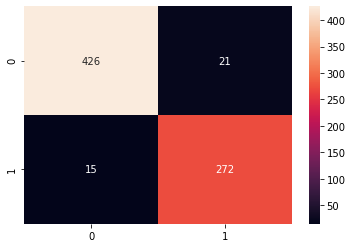

In [47]:
plt.figure(figsize = (6,4))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt = '0.0f')

In [48]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       False       0.97      0.95      0.96       447
        True       0.93      0.95      0.94       287

    accuracy                           0.95       734
   macro avg       0.95      0.95      0.95       734
weighted avg       0.95      0.95      0.95       734



#### Ensemble Learning - Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier
# n_estimators = number of trees
# Bootstrap = Random selection of data for each Decision Tree of RF
clf_rf = RandomForestClassifier(criterion = 'entropy', bootstrap=True, n_estimators=150)

In [52]:
clf_rf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=150)

In [58]:
clf_rf.score(x_test, y_test)

0.9904632152588556

In [59]:
clf_rf.score(x_train, y_train)

1.0

In [61]:
# Predicted O/P will 1 or 0 from Decision Tree Rules
predictions = clf_rf.predict(x_test)

In [62]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, predictions)

array([[441,   6],
       [  1, 286]], dtype=int64)

<AxesSubplot:>

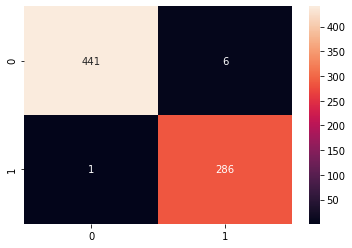

In [63]:
plt.figure(figsize = (6,4))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt = '0.0f')

In [64]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       False       1.00      0.99      0.99       447
        True       0.98      1.00      0.99       287

    accuracy                           0.99       734
   macro avg       0.99      0.99      0.99       734
weighted avg       0.99      0.99      0.99       734

